# Infering the phylogenetic relationship between archaic and AMH Y

In [1]:
library(tidyverse)
library(here)
library(phangorn)
library(cowplot)
library(lemon)

suppressPackageStartupMessages({
    library(ggtree)
    library(treeio)
})

devtools::load_all(".")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /mnt/expressions/mp/archaic-ychr
Loading required package: ape

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘lemon’

The following object is masked from ‘package:purrr’:

    %||%

Loading ychr


Bootstrapping info for ape/phangorn: http://ape-package.ird.fr/ape_faq.html#bootphylo

In [2]:
aln_full <- read.dna("../data/fasta/full_merged_nodmg.fa", format = "fasta")

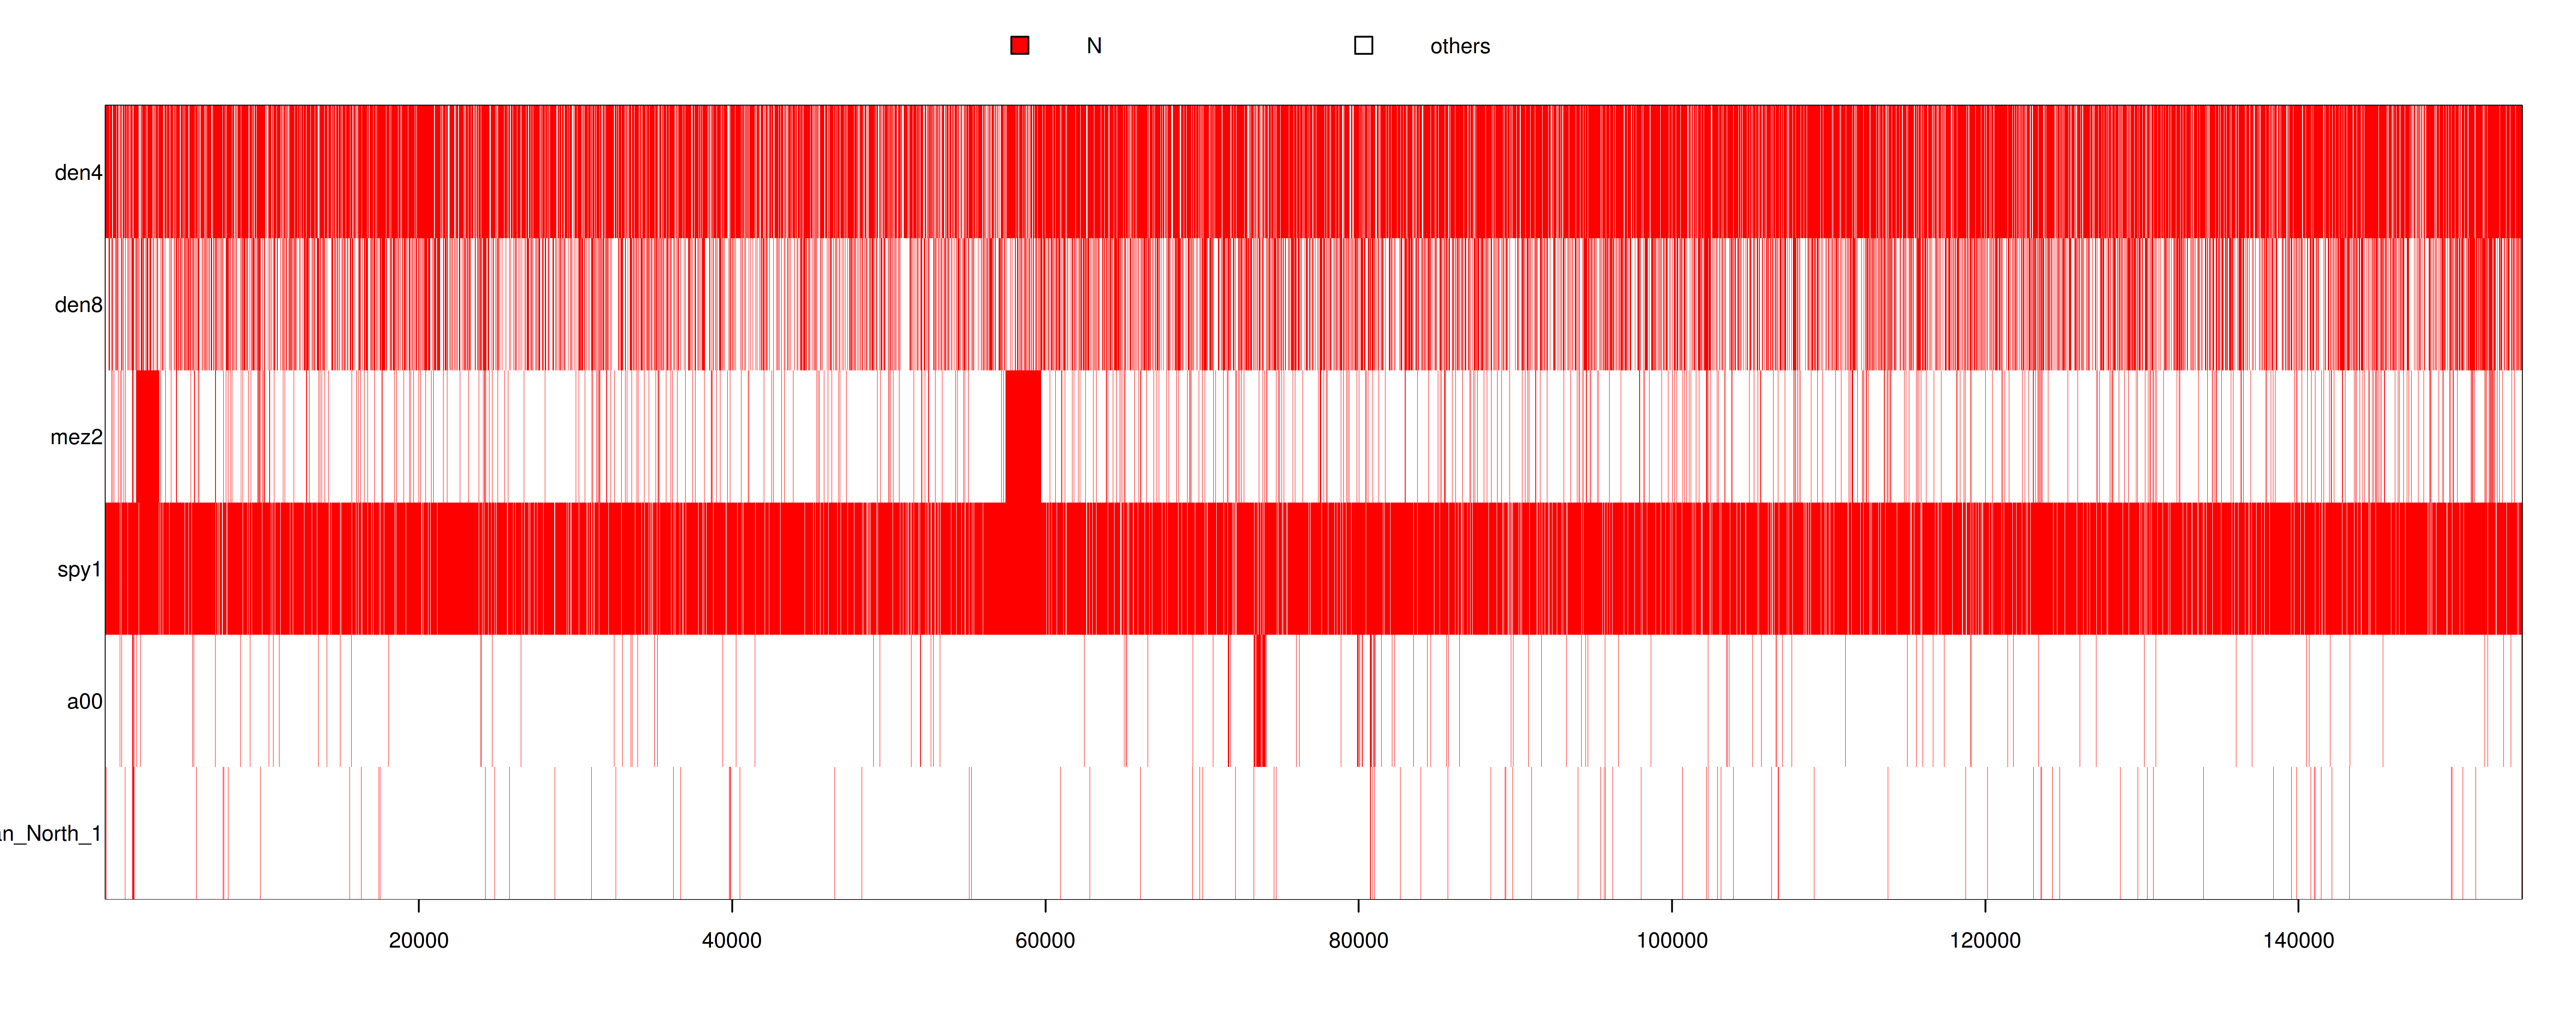

In [4]:
set_dim(20, 8)
aln_full[c("den4", "den8", "mez2", "spy1", "a00", "S_Ju_hoan_North_1"), ] %>%
    image("N")

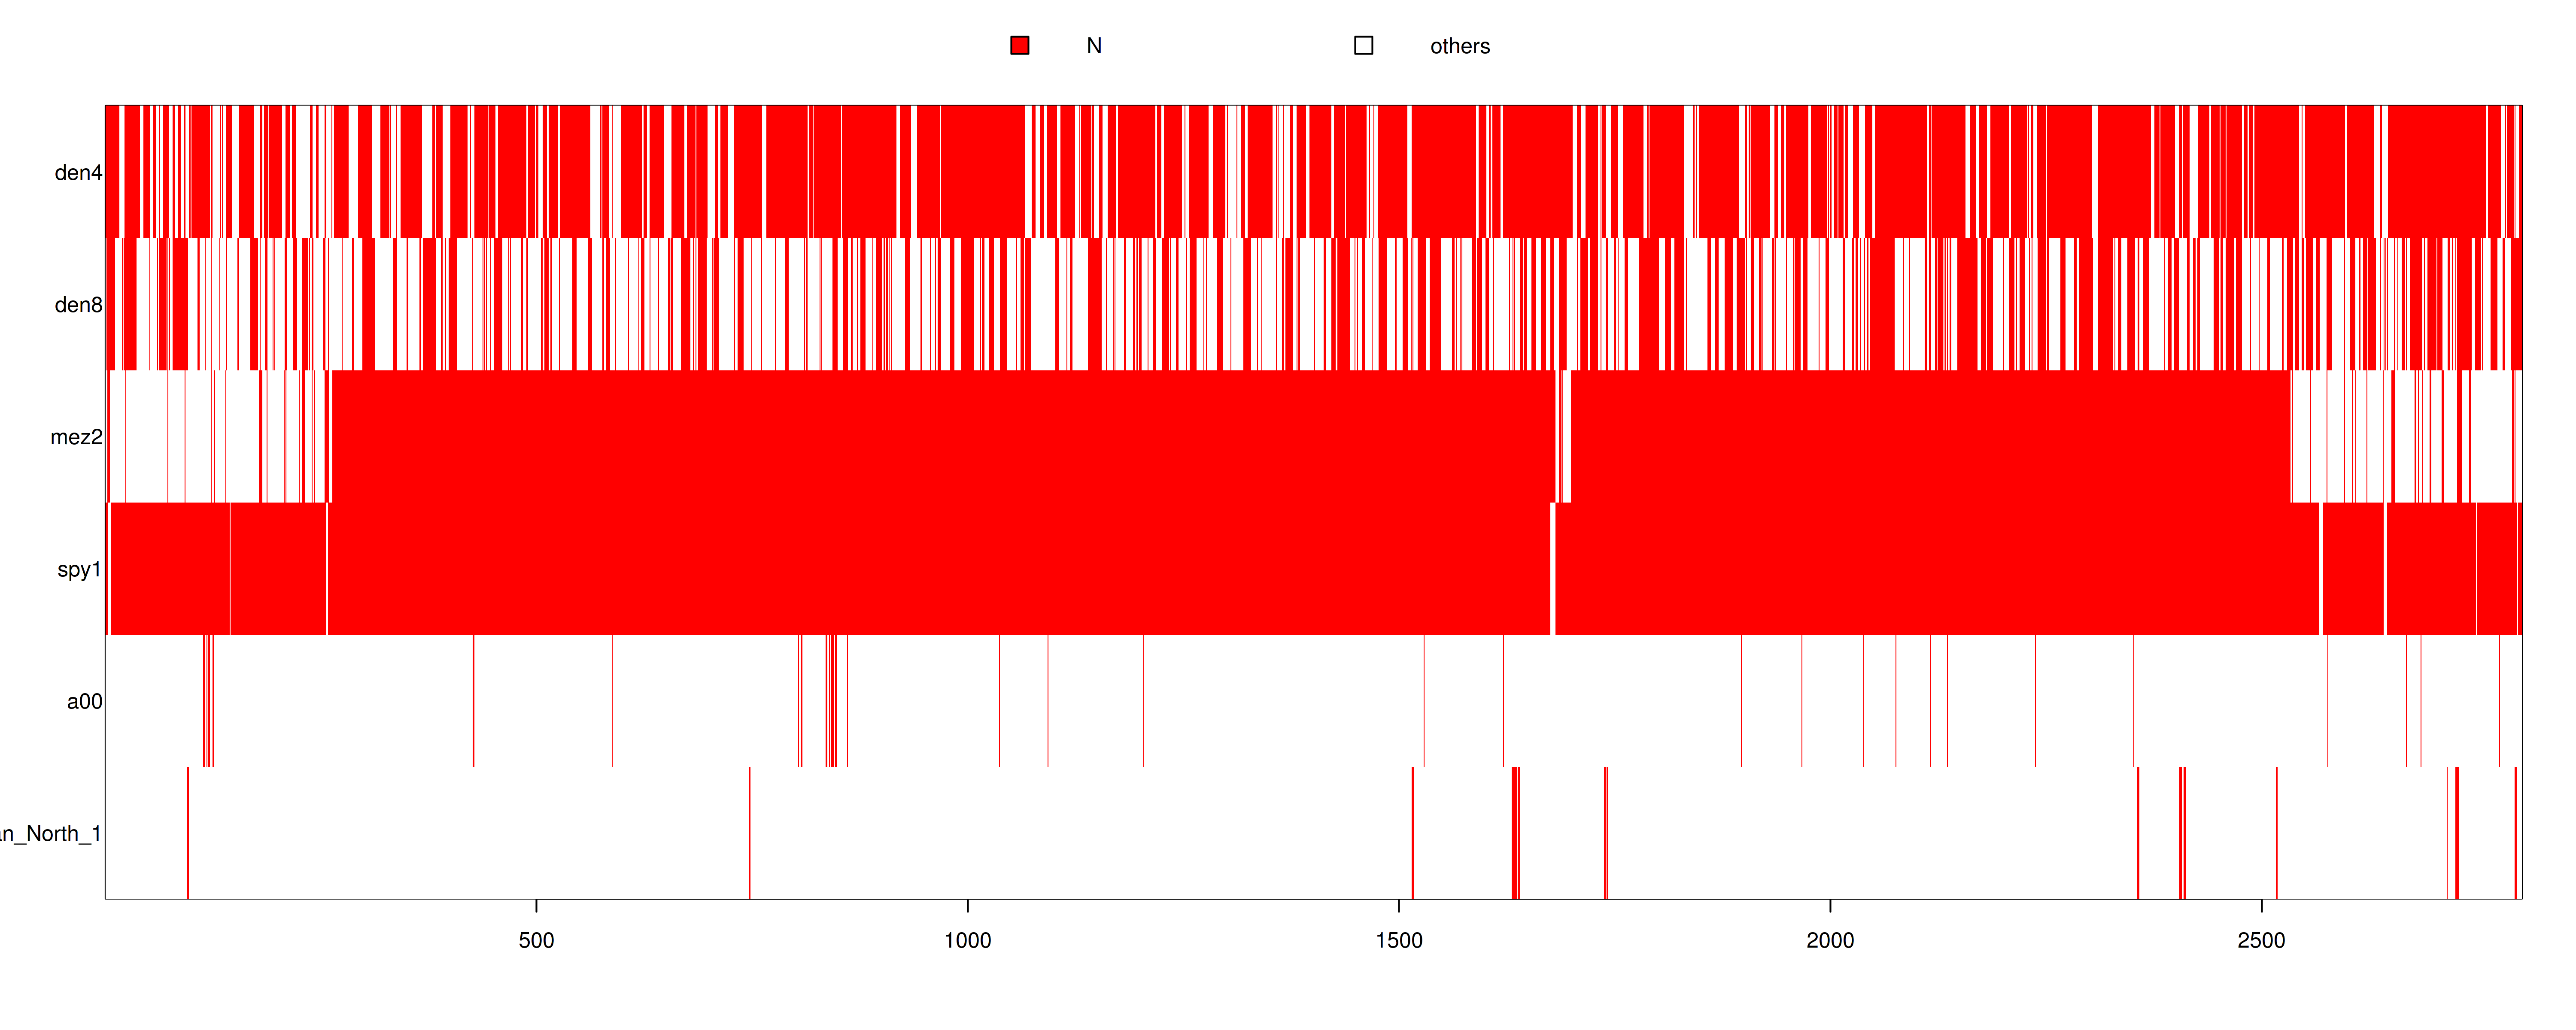

In [9]:
set_dim(20, 8)
aln_full[c("den4", "den8", "mez2", "spy1", "a00", "S_Ju_hoan_North_1"), 57200:60000] %>%
    image("N")

### Pairwise distances vs Mezmaiskaya 2 using `dist.dna` from ape

Without pairwise deletion:

In [10]:
for (m in c("raw", "N", "JC69", "F81", "TN93", "K80")) {
    cat("Mez2 -", m, "\n")
    dist.dna(aln_full, model = m, pairwise.deletion = F) %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - raw 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.005747126       0.006465517       0.010057471       0.982758621 
Mez2 - N 
S_Ju_hoan_North_1               a00              den4             chimp 
                8                 9                14              1368 
Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.005769259       0.006493547       0.010125515               NaN 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.005770325       0.006494898       0.010128806               NaN 
Mez2 - TN93 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.005772831       0.006497575       0.010128830               NaN 
Mez2 - K80 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.005769434       0.006493941       0.010125692               NaN 


With pairwise deletion:

In [11]:
for (m in c("raw", "N", "JC69", "F81", "TN93", "K80")) {
    cat("Mez2 -", m, "\n")
    dist.dna(aln_full, model = m, pairwise.deletion = T) %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - raw 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322670        0.01328688        0.01633552        0.97887127 
Mez2 - N 
S_Ju_hoan_North_1               a00              den4             chimp 
             1773              1762               430            132825 
Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01334472        0.01340598        0.01651605               NaN 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01335045        0.01341176        0.01652483               NaN 
Mez2 - TN93 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01335189        0.01341317        0.01652922               NaN 
Mez2 - K80 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01334511        0.01340644        0.01651691               NaN 


### Pairwise distances vs Mezmaiskaya 2 using `dist.ml` from phangorn

Only two molecular evolution models are implemented, JC69 and F81:

In [12]:
for (m in c("JC69", "F81")) {
    cat("Mez2 -", m, "\n")
    dist.ml(aln_full, model = m, exclude = "none") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01334472        0.01340598        0.01651605       10.00000000 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01357922        0.01363764        0.01684349       10.00000000 


In [13]:
for (m in c("JC69", "F81")) {
    cat("Mez2 -", m, "\n")
    dist.ml(aln_full, model = m, exclude = "pairwise") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01334472        0.01340598        0.01651605       10.00000000 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01357922        0.01363764        0.01684349       10.00000000 


In [14]:
for (m in c("JC69", "F81")) {
    cat("Mez2 -", m, "\n")
    dist.ml(aln_full, model = m, exclude = "all") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.005769259       0.006493547       0.010125515      10.000000000 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.005888749       0.006632031       0.010347147      10.000000000 


It seems that given that it's important to use pairwise deletion (due to the large number of missing sites in ancient Y chromosomes), any reasonable default model is fine here. The "vs-chimp" distances are giving NaN values for some `dist.dna` models and also are always fixed to a hardcoded value 10 by the `dist.ml` function. After looking at the code, this seems to be a default value for overflow situations, which is affecting both methods regardless of the molecular evolution model (except for models which are simply based on the proportion of matching alleles such as the "raw" option in `dist.dna`).

It's also quite interesting that the "raw" proportions of sites give the same values as those obtained by more sophisticated models. I suppose this makes sense given the relatively short evolutionary time scale I'm dealing with here.

**Note**: Yeah, so the man page for `dist.dna` clearly says that

> If the sequences are very different, most evolutionary distances are undefined and a non-finite value (Inf or NaN) is returned. You may do dist.dna(, model = "raw") to check whether some values are higher than 0.75.

The explanation for this magic number comes from the limitations of the substitution models and is quite obvious from looking at the distance equations:

More details [here](https://www.megasoftware.net/mega1_manual/Distance.html):
> The Jukes-Cantor distance can be computed if p < 0.75; otherwise it is not applicable because the argument of the logarithm becomes negative. 

From the [mailing list](https://r-sig-phylo.r-project.narkive.com/NjZMUVzZ/bootstrapping-with-boot-phylo):
> the correct distance for (say) the Jukes-Cantor model or the Kimura 2-parameter model when the sequences differ by more than 75% is (positive) infinity, since these are inferred to be unrelated sequences

> Most models ("K80", "JC69" etc.) are not defined for distances >=0.75 and will return Inf or NaN (the 0.75 can vary a bit, depending on the substitution model)

## Neighbor-joining tree

In [2]:
aln_full <- read.phyDat("../data/fasta/full_merged_nodmg.fa", format = "fasta")

#aln_full$ustishim <- NULL

aln_full <- as.DNAbin(aln_full)

In [3]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))

In [4]:
tr <- buildtree_distdna_midpoint(aln_full)
bp <- boot.phylo(tr, aln_full, buildtree_distdna_midpoint, B = 100, mc.cores = 40)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [5]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan")

In [6]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [7]:
tr <- as.treedata(tr, bp)

In [8]:
tr <- drop.tip(tr, tip = "chimp")
den_node <- getMRCA(as.phylo(tr), tip = c("Denisova 4", "Denisova 8"))
neand_node <- getMRCA(as.phylo(tr), tip = c("Spy 94a", "Mezmaiskaya 2"))
amh_node <- getMRCA(as.phylo(tr), tip = c("A00", "Saami"))
amhneand_node <- getMRCA(as.phylo(tr), tip = c("A00", "Mezmaiskaya 2"))
root_node <- getMRCA(as.phylo(tr), tip = c("Denisova 8", "A00"))

In [9]:
df <- as_tibble(tr) %>%
    filter(!is.na(label)) %>%
    select(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

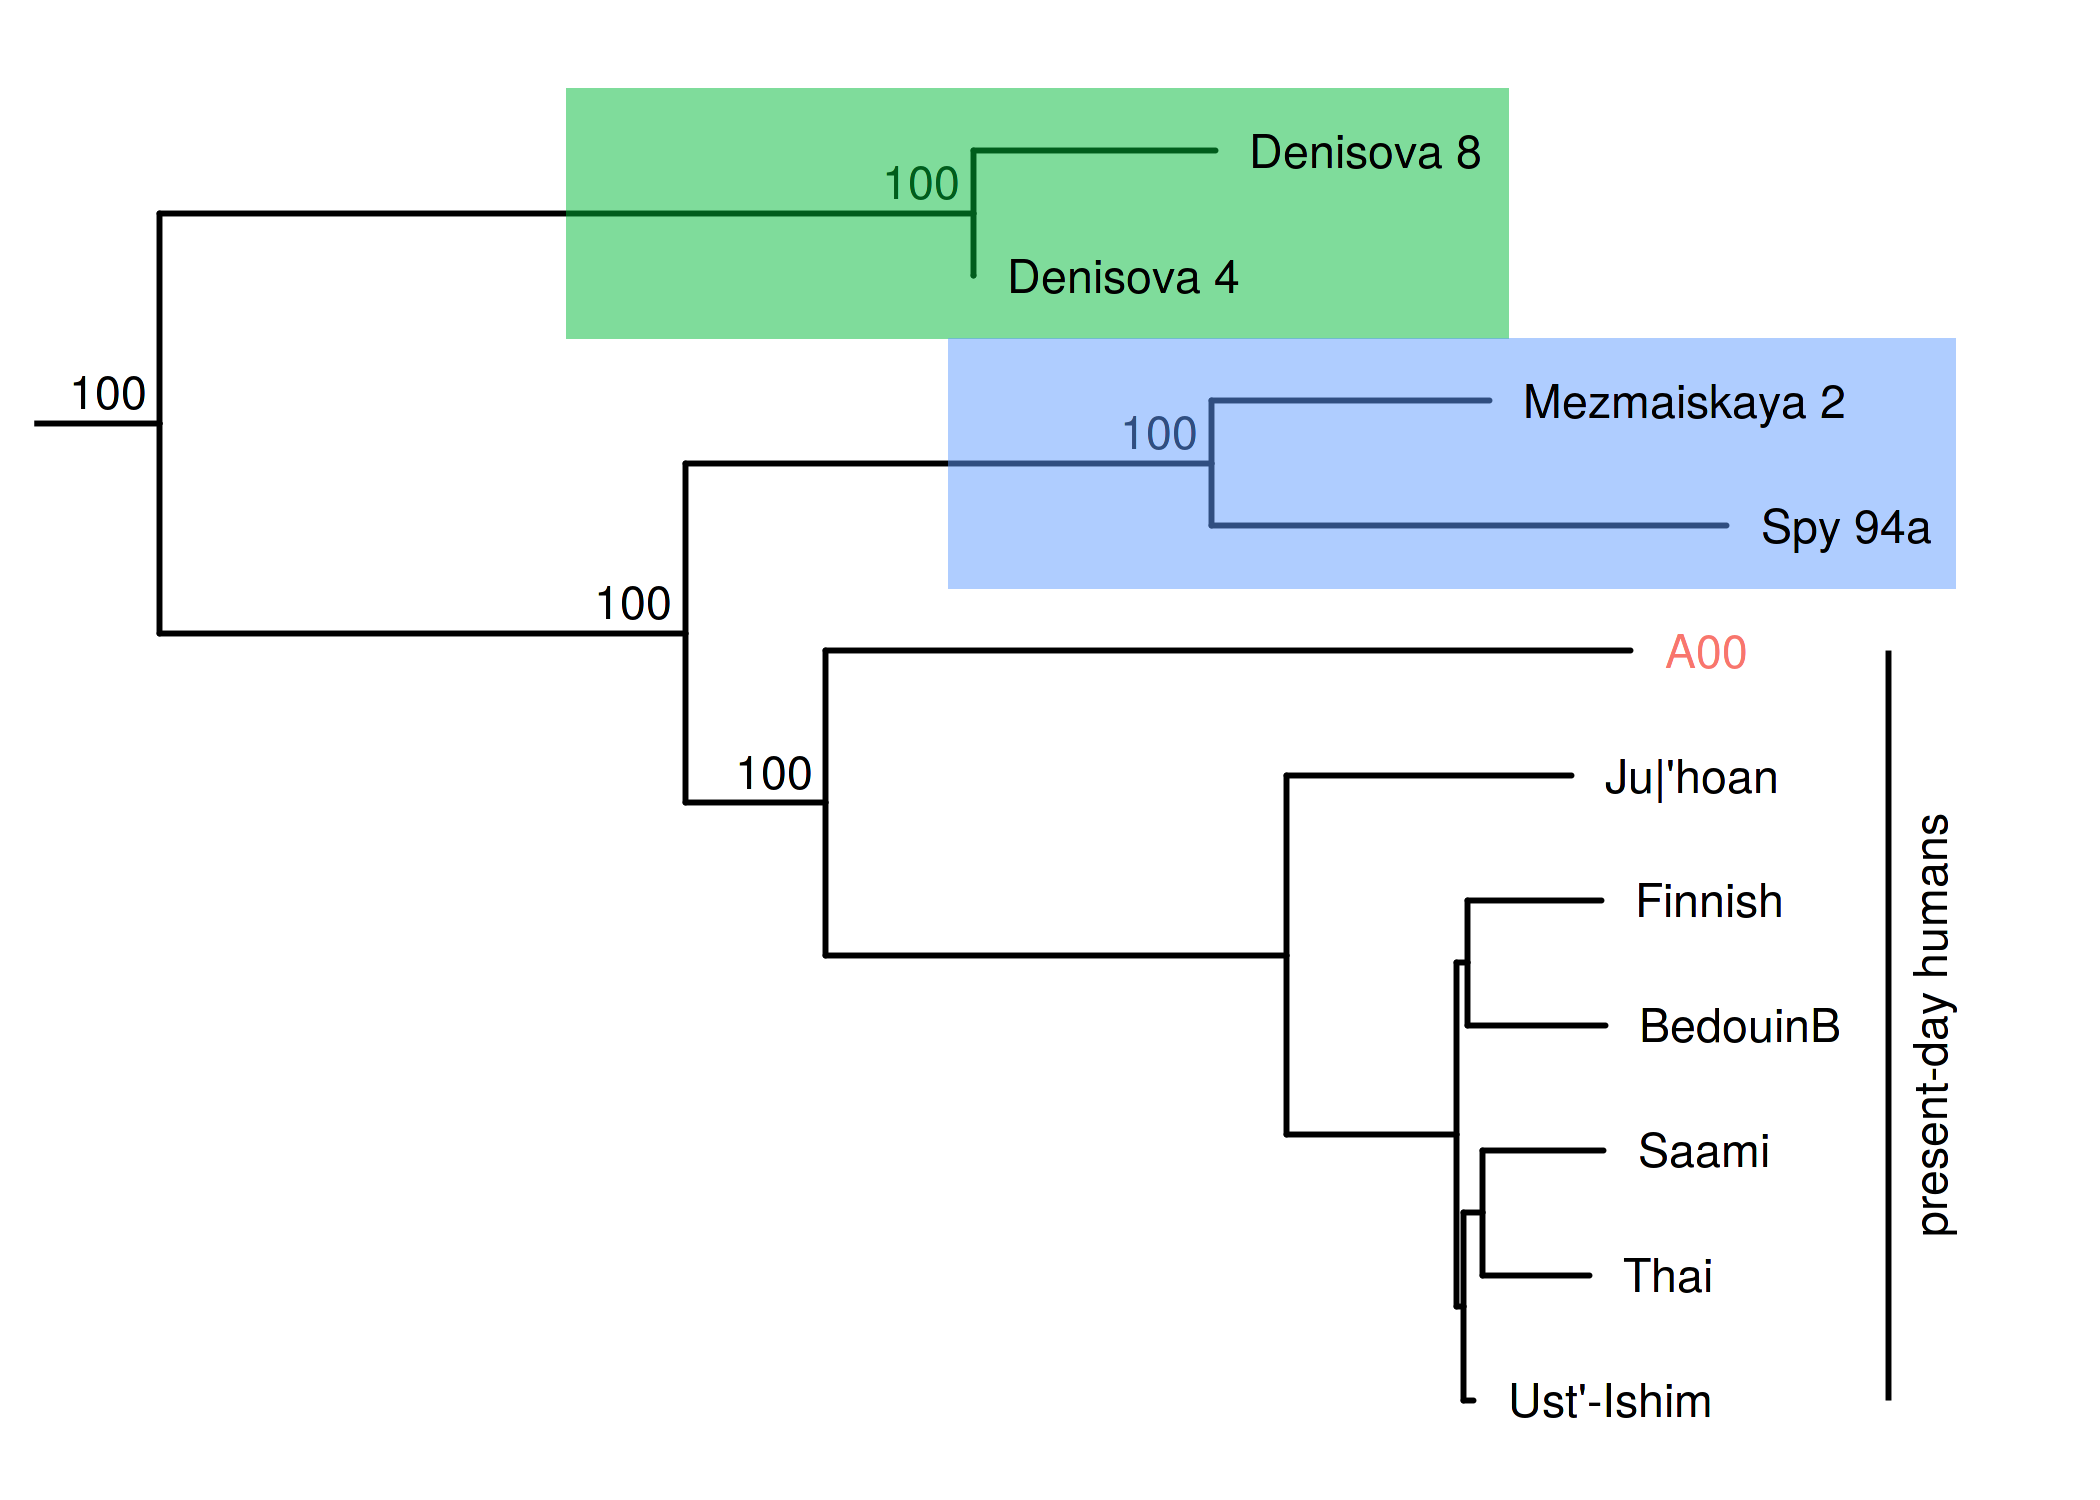

In [12]:
set_dim(7, 5)

colors <- scales::hue_pal()(3)

p <- ggtree(tr, ladderize = F) +
    geom_text2(nudge_y = 0.25, nudge_x = -0.0004, aes(label = bootstrap,
                   subset = node %in% c(den_node, neand_node, amh_node, amhneand_node, root_node))) +
    geom_hilight(node = den_node, fill = colors[2], extend = 0.00225) +
    geom_hilight(node = neand_node, fill = colors[3], extend = 0.00175) +

    geom_cladelabel(offset.text = 0.0002, node = amh_node, angle = 90, hjust = "center",
                    offset = 0.001, align = T, label = "present-day humans") +

    geom_rootedge(rootedge = root_node)

p %<+% df +
    geom_tiplab(aes(color = sample_name == "A00"), offset = 0.0002) +
    scale_color_manual(values = c("black", colors[1])) +
    coord_capped_cart(gap = 1, x = c(-0.00025, 0.014), bottom = "both", left = "none")# + theme_tree2()

## Maximum parsimony

In [24]:
aln_phyDat <- as.phyDat(aln_full)

In [25]:
init_tree <- nj(dist.dna(aln_full, model = "raw"))

In [26]:
parsimony(init_tree, aln_phyDat)

[1] 154589

In [27]:
tree_pars <- optim.parsimony(init_tree, aln_phyDat)

Final p-score 154349 after  3 nni operations 


In [28]:
parsimony(tree_pars, aln_phyDat)

[1] 154349

In [29]:
tree_pars


Phylogenetic tree with 12 tips and 10 internal nodes.

Tip labels:
	S_BedouinB_1, chimp, spy1, S_Ju_hoan_North_1, S_Finnish_2, S_Thai_1, ...

Unrooted; no branch lengths.

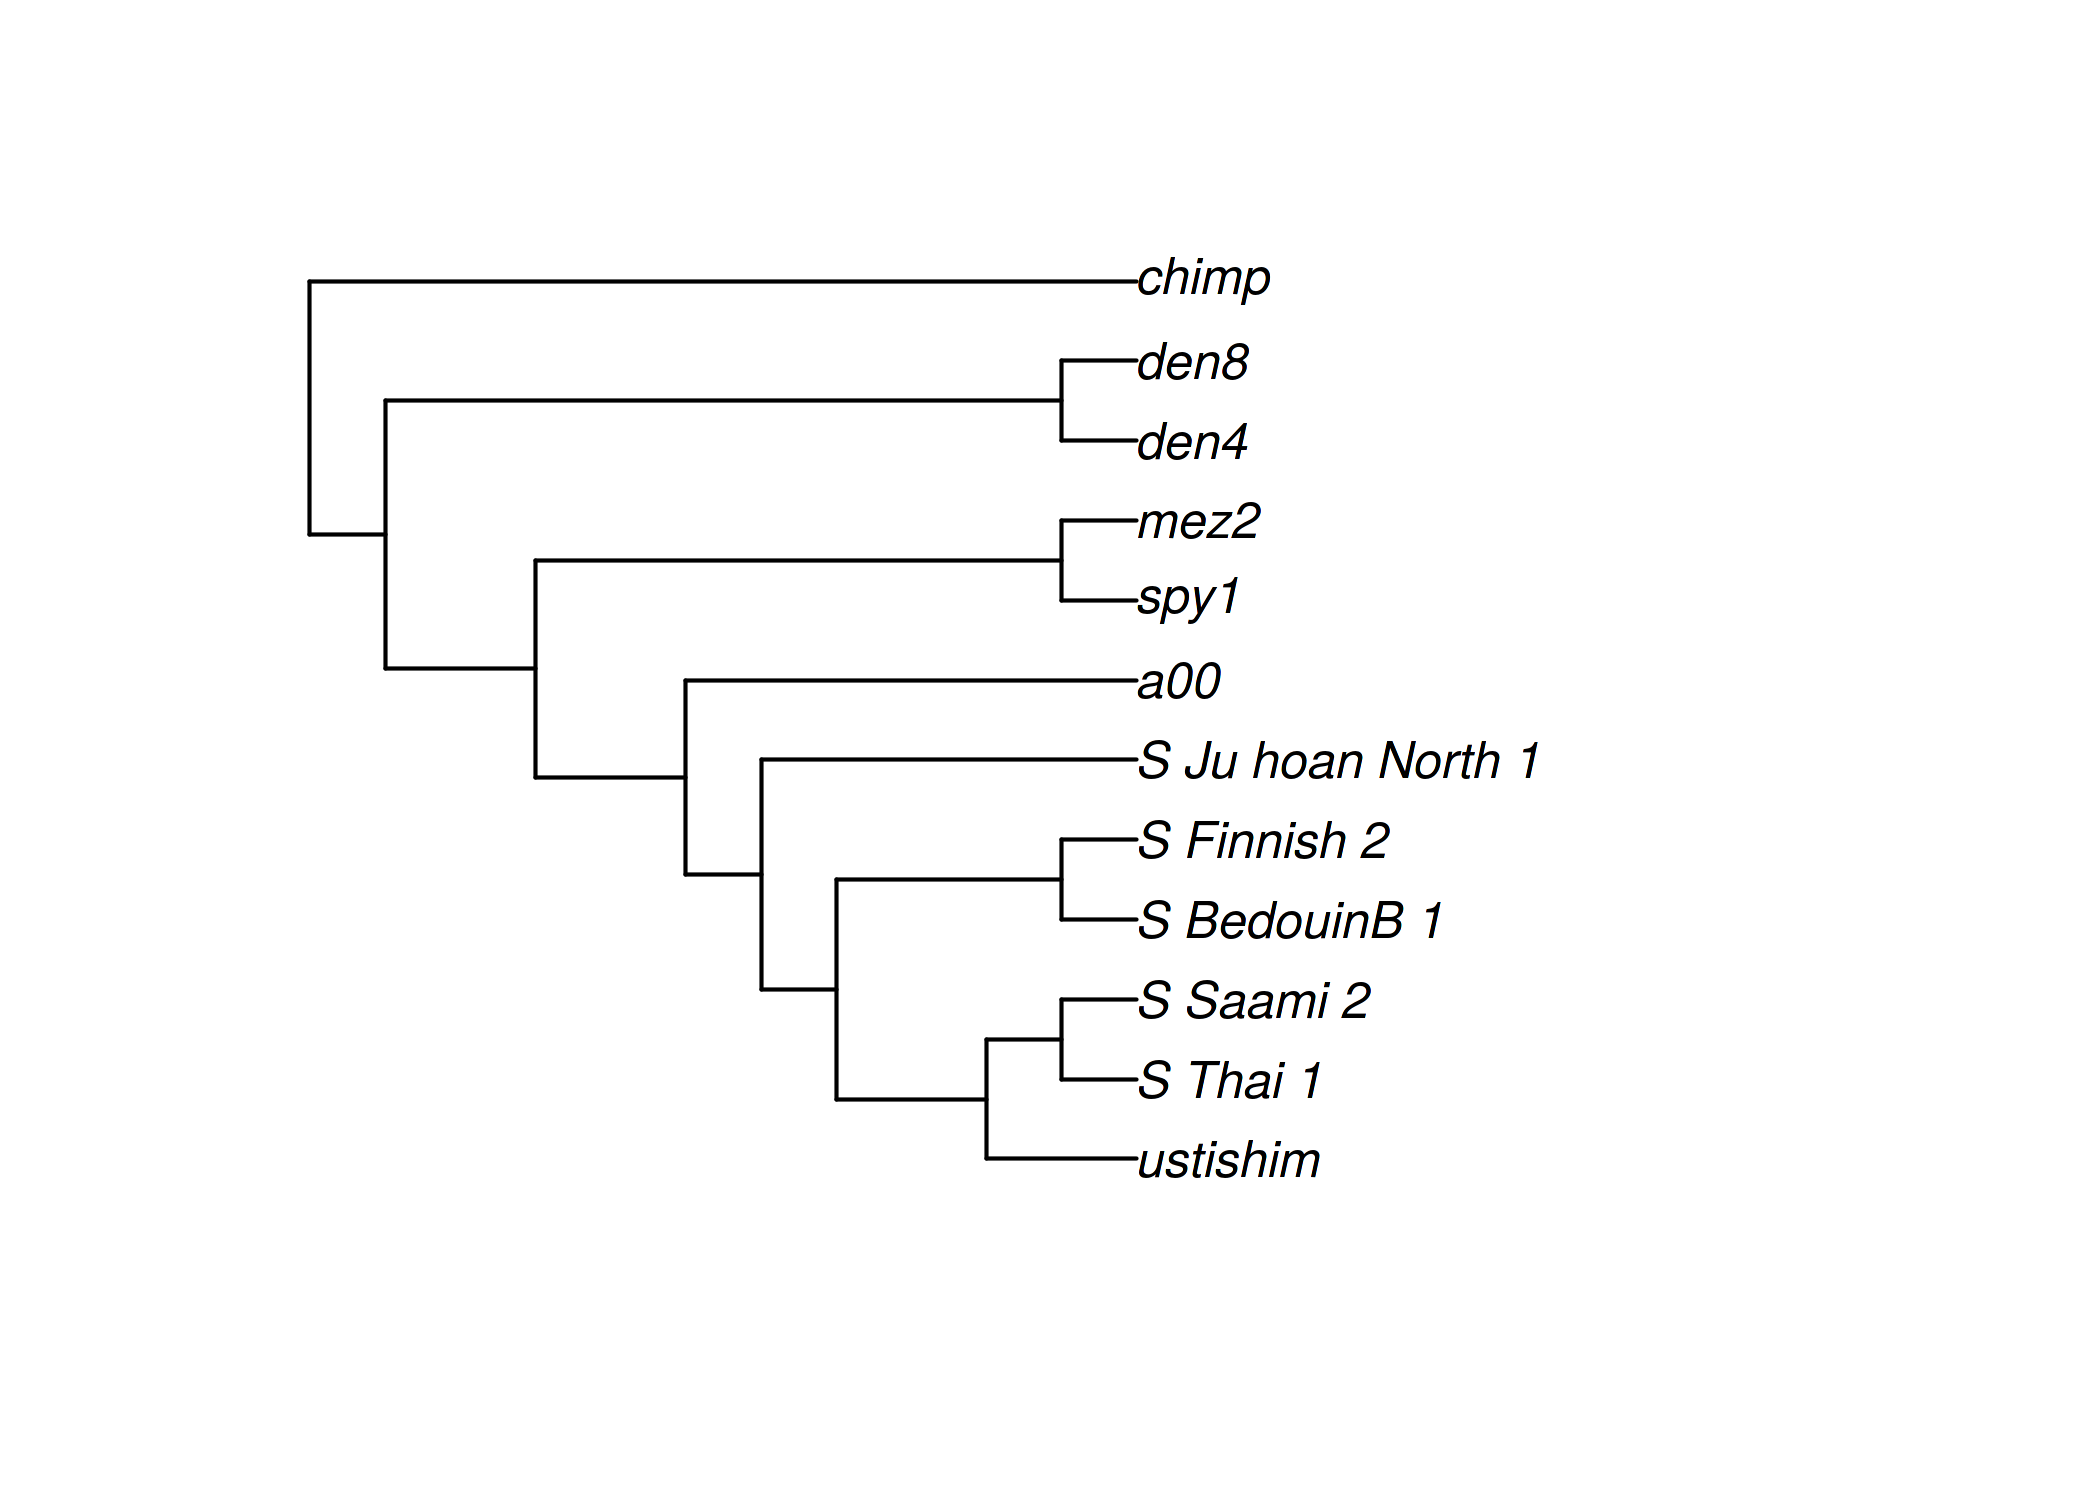

In [30]:
plot(root(tree_pars, outgroup = "chimp", resolve.root = T))

## Neighbor-joining tree

In [193]:
aln_lippold <- read.phyDat("../data/fasta/lippold_merged_nodmg.fa", format = "fasta")

aln_lippold$den4 <- NULL
aln_lippold$den8 <- NULL

aln_lippold <- as.DNAbin(aln_lippold)

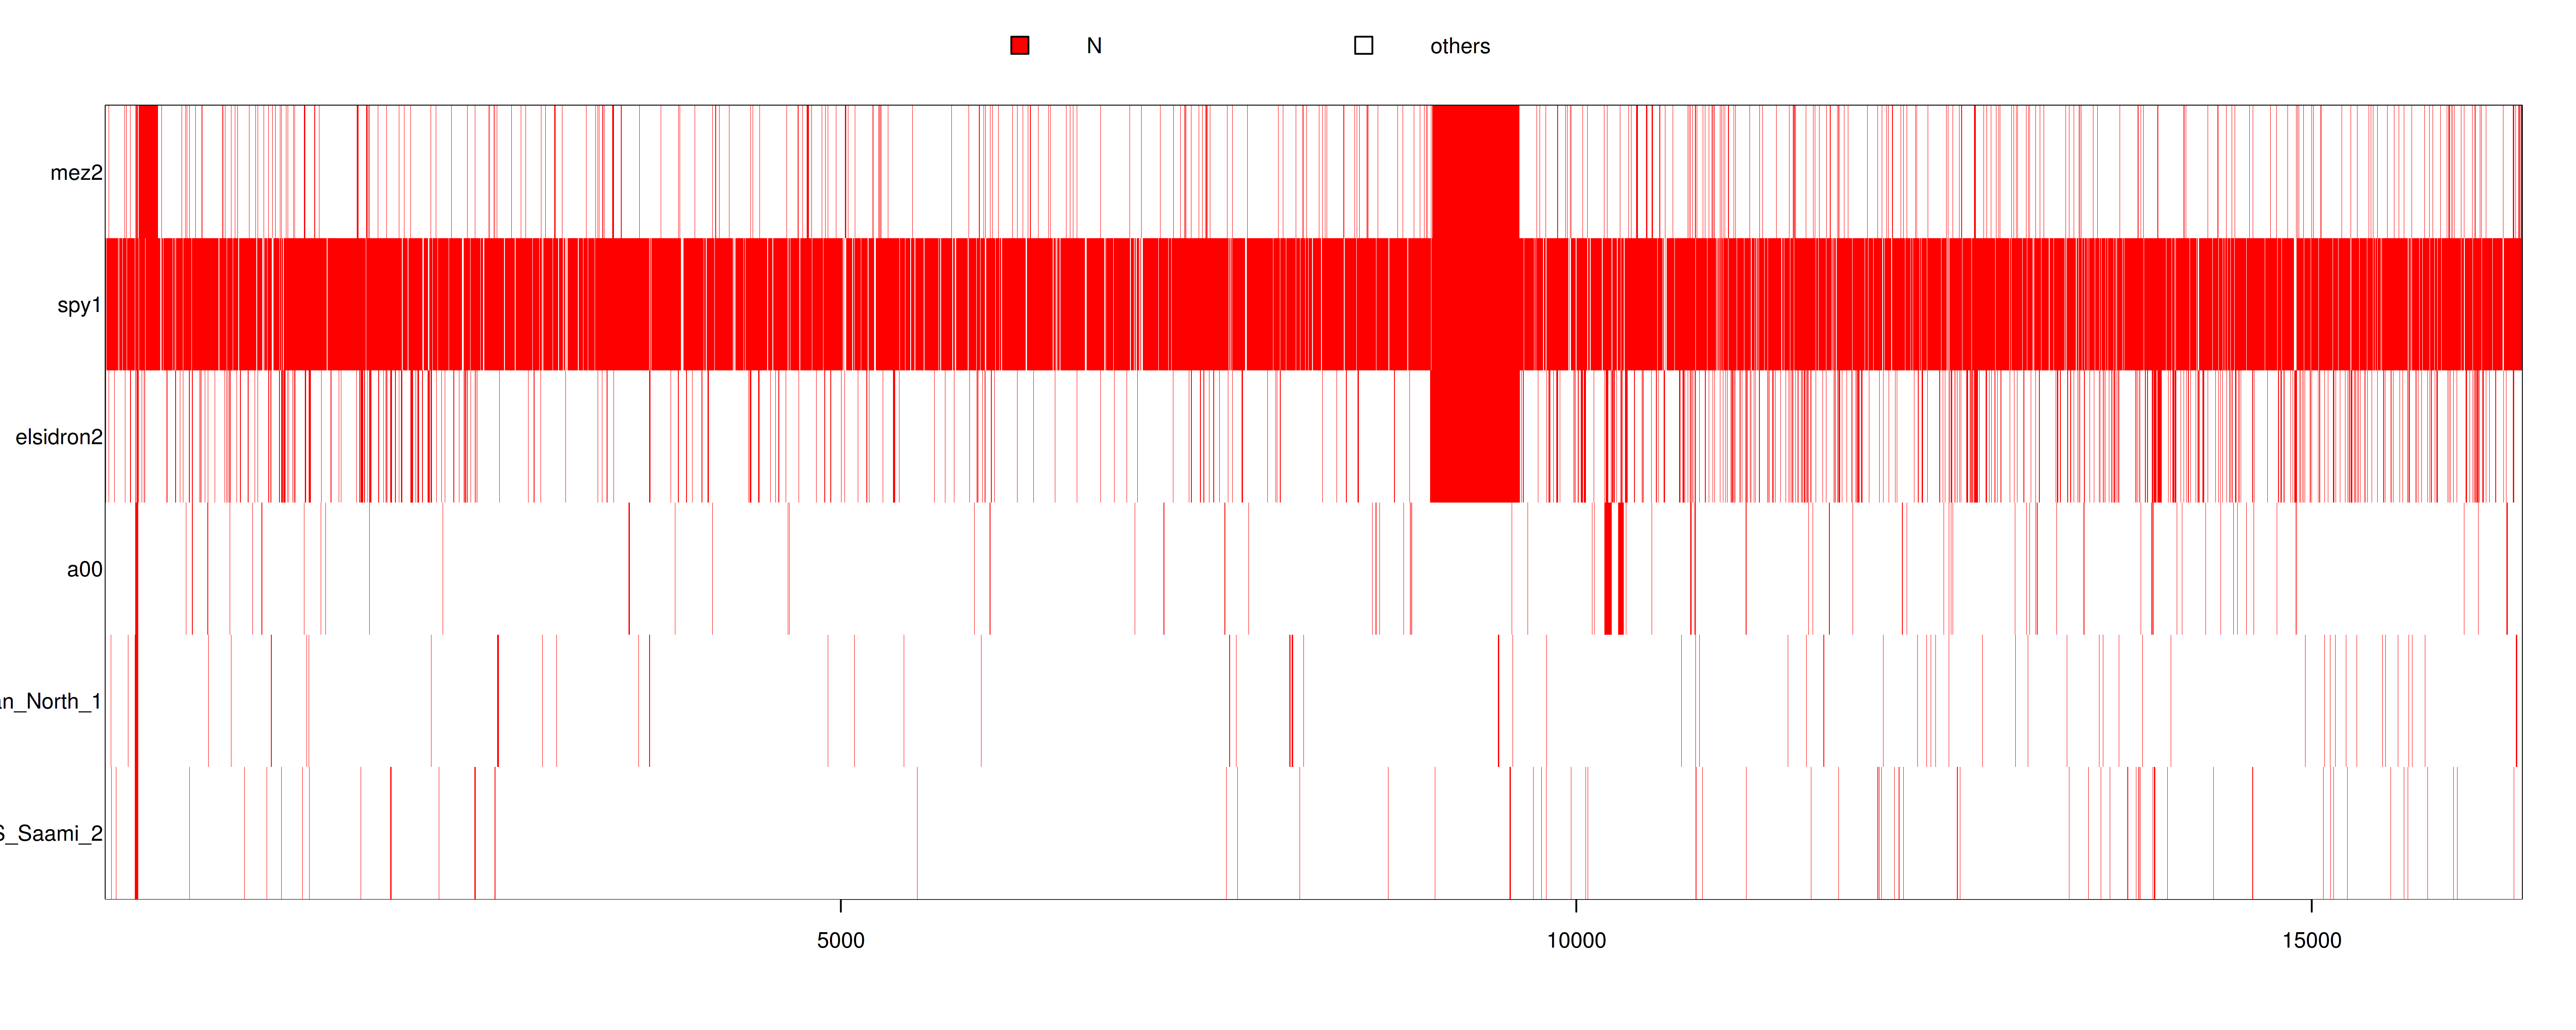

In [194]:
set_dim(20, 8)
aln_lippold[c("mez2", "spy1", "elsidron2", "a00", "S_Ju_hoan_North_1", "S_Saami_2"), ] %>%
    image("N")

In [195]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))

In [196]:
tr <- buildtree_distdna_midpoint(aln_lippold)
bp <- boot.phylo(tr, aln_lippold, buildtree_distdna_midpoint, B = 100, mc.cores = 40)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [208]:
buildtree_distdna_outgroup <- function(x) root(nj(dist.dna(x, model = "raw", pairwise.deletion = T)),
                                               outgroup = "chimp", resolve.root = T)

In [209]:
tr <- buildtree_distdna_outgroup(aln_lippold)
bp <- boot.phylo(tr, aln_lippold, buildtree_distdna_outgroup, B = 100, mc.cores = 40)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [210]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan")

In [211]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [212]:
tr <- as.treedata(tr, bp)

In [213]:
tr <- drop.tip(tr, tip = "chimp")
neand_node <- getMRCA(as.phylo(tr), tip = c("El Sidrón 1253 (560 kb)", "Mezmaiskaya 2"))
amh_node <- getMRCA(as.phylo(tr), tip = c("A00", "Saami"))
amhneand_node <- getMRCA(as.phylo(tr), tip = c("A00", "Mezmaiskaya 2"))
root_node <- getMRCA(as.phylo(tr), tip = c("Spy 94a", "A00"))

In [214]:
df <- as_tibble(tr) %>%
    filter(!is.na(label)) %>%
    select(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

Warning message in min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”Warning message in min(y, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”Warning message in max(y, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”Warning message:
“Computation failed in `stat_hilight()`:
arguments imply differing number of rows: 0, 1”

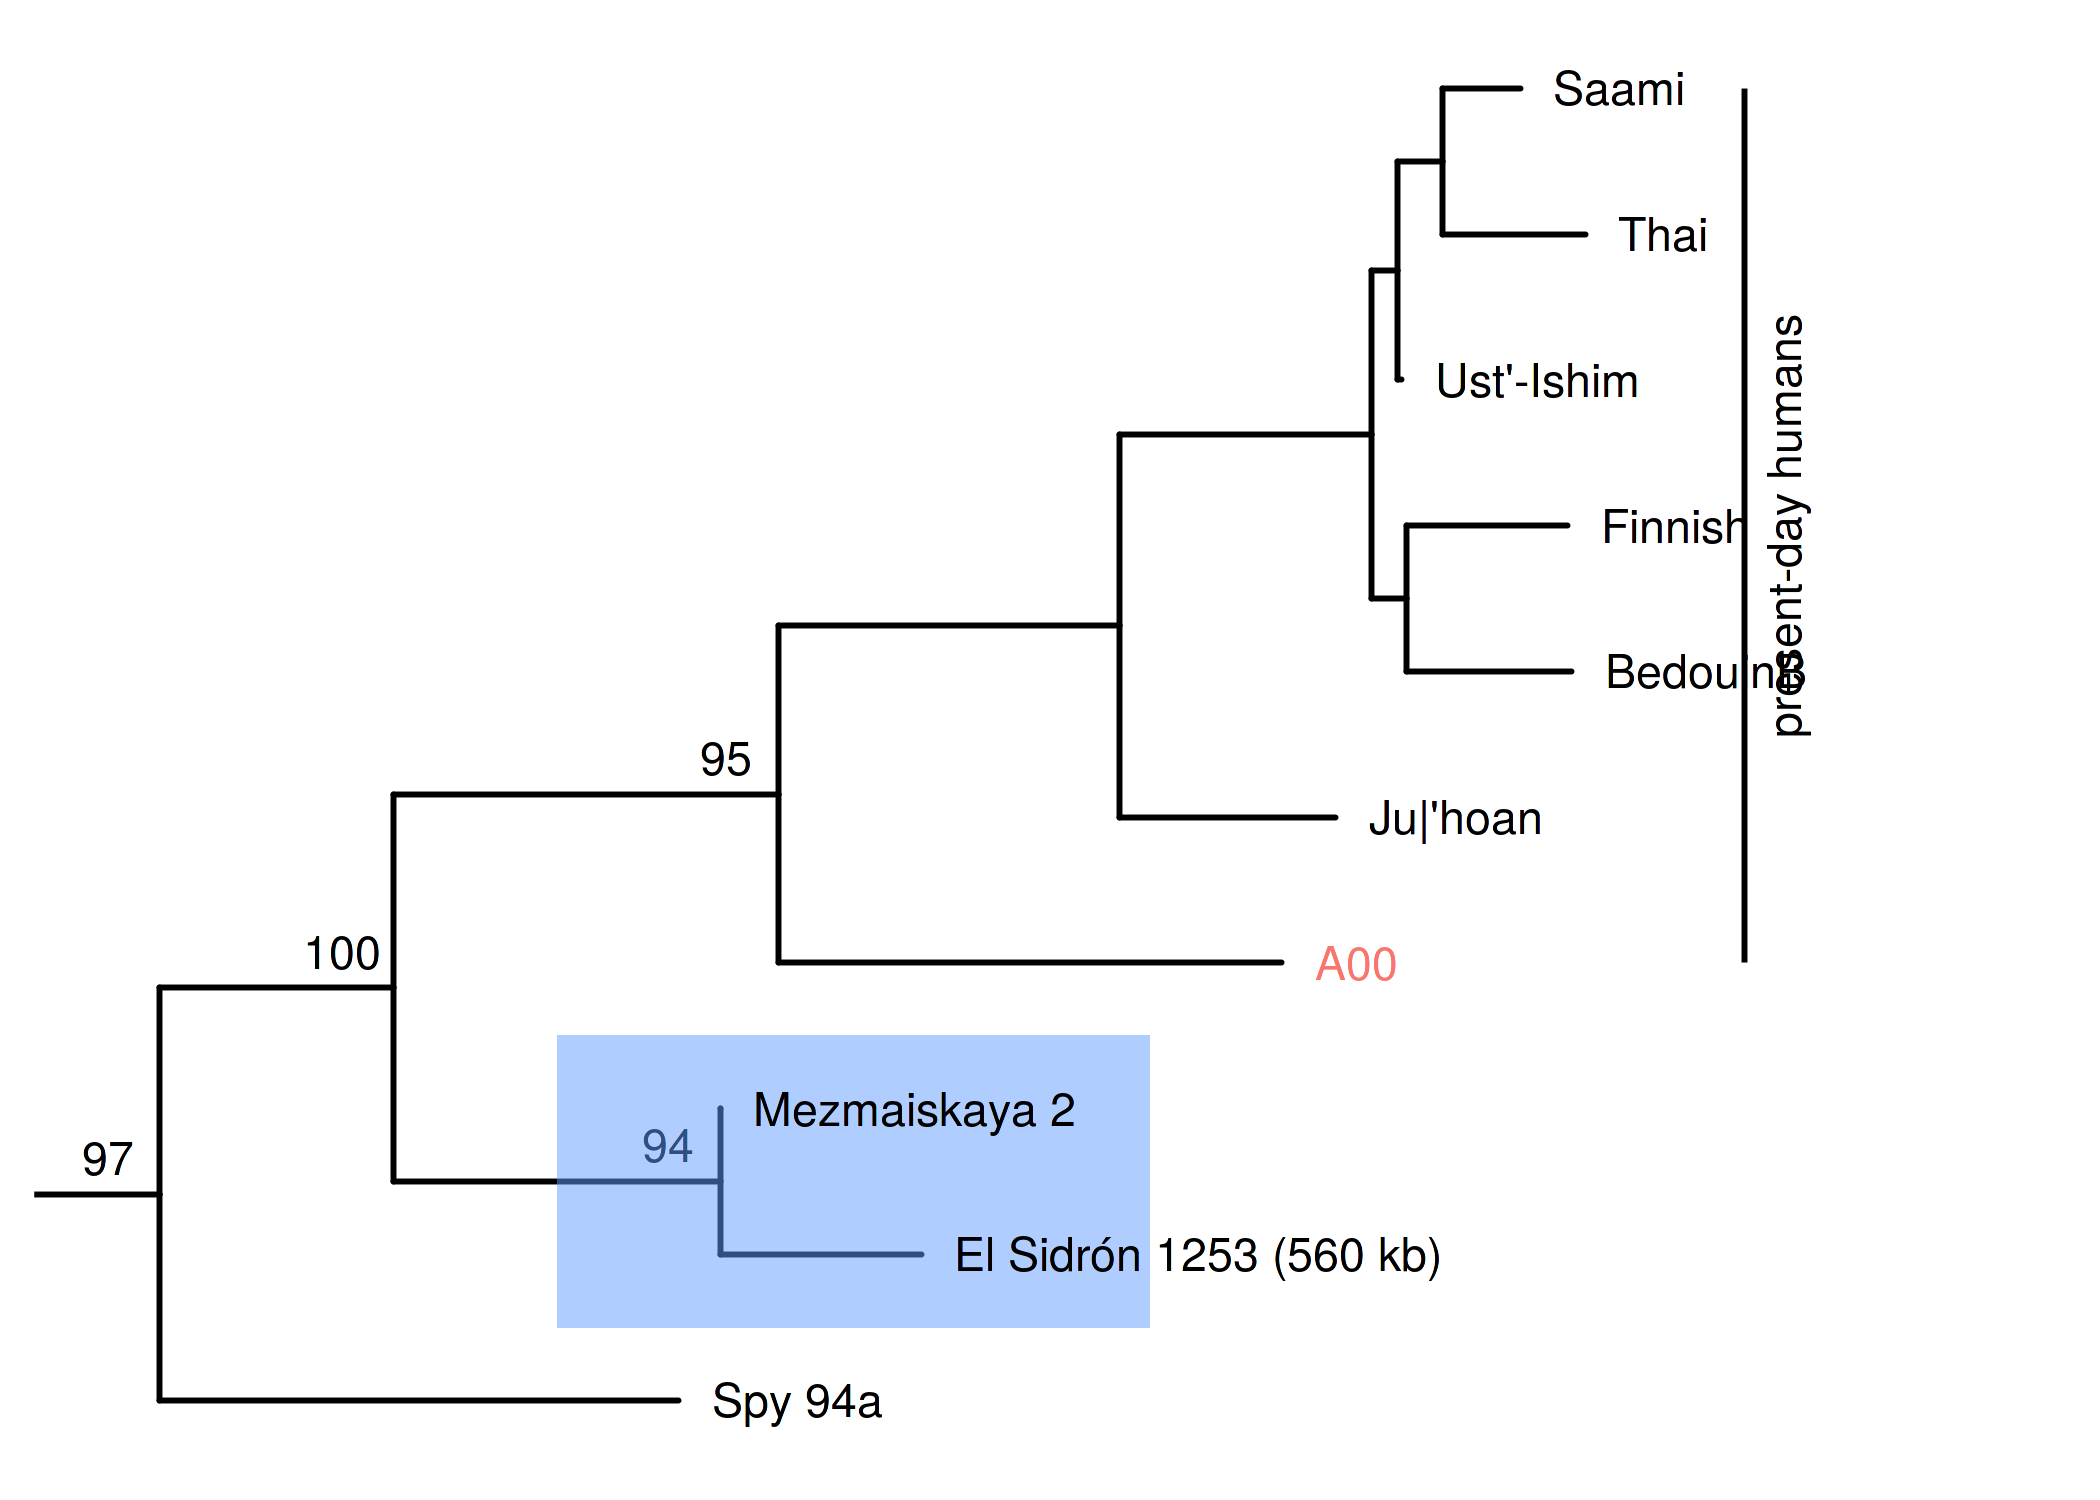

In [215]:
set_dim(7, 5)

colors <- scales::hue_pal()(3)

p <- ggtree(tr) +
    geom_text2(nudge_y = 0.25, nudge_x = -0.0004, aes(label = bootstrap,
                   subset = node %in% c(den_node, neand_node, amh_node, amhneand_node, root_node))) +
    geom_hilight(node = den_node, fill = colors[2], extend = 0.00225) +
    geom_hilight(node = neand_node, fill = colors[3], extend = 0.00175) +

    geom_cladelabel(offset.text = 0.0002, node = amh_node, angle = 90, hjust = "center",
                    offset = 0.001, align = T, label = "present-day humans") +

    geom_rootedge(rootedge = root_node)

p %<+% df +
    geom_tiplab(aes(color = sample_name == "A00"), offset = 0.0002) +
    scale_color_manual(values = c("black", colors[1])) +
    coord_capped_cart(gap = 1, x = c(-0.00025, 0.014), bottom = "both", left = "none")# + theme_tree2()